# 📚 What is Ensemble Learning?

**Ensemble learning** is a technique where multiple models (also called **learners** or **estimators**) are combined to solve a problem and improve performance. The main idea is that a group of **weak models**, when combined properly, can create a **stronger overall model**.
- Ensemble learning helps improve machine learning results by combining several models. This approach allows the production of better predictive performance compared to a single model. Basic idea is to learn a set of classifiers (experts) and to allow them to vote.



Eg:- Majority Voting, Average, Weighted Mean are basic techniques
---

## 🔧 Some of Advance Types of Ensemble Methods:

### 1. 🧺 Bagging (Bootstrap Aggregating)

- **How it works**: Trains several instances of the same model on **random subsets** of the training data (with replacement), then **averages** the results (for regression) or uses **majority voting** (for classification).
- **Goal**: Reduce **variance** and prevent **overfitting**.
- **Example**: `Random Forest` (ensemble of decision trees)

---

### 2. 🚀 Boosting

- **How it works**: Models are trained **sequentially**. Each new model focuses on **correcting the errors** made by the previous one.
- **Goal**: Reduce **bias** and improve **accuracy**.
- **Popular boosting methods**:
  - AdaBoost
  - Gradient Boosting
  - XGBoost, LightGBM, CatBoost

---

### 3. 🧠 Stacking (Stacked Generalization)

- **How it works**: Combines predictions from multiple models using a **meta-model** (e.g., logistic regression) that learns how to best combine the outputs of the base models.
- **Common use**: Frequently used in machine learning competitions like **Kaggle**.

---

## 🎯 Why Use Ensemble Learning?

- ✅ Better accuracy than a single model  
- ✅ More robust and generalizes better to new data  
- ✅ Reduces overfitting  
- ✅ Helps capture more complex patterns in the data


# Voting Classifier

In [1]:
import pandas as pd

df = pd.read_excel("D:\\utils\\DataSets\\Raisin_Dataset.xlsx")


X = df[["Area", "MajorAxisLength", "MinorAxisLength", "Eccentricity", "ConvexArea", "Extent", "Perimeter"]]
y = df["Class"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [2]:
from sklearn.svm import SVC

model = SVC(kernel="rbf")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

model.n_iter_

              precision    recall  f1-score   support

       Besni       0.86      0.75      0.80        83
     Kecimen       0.81      0.90      0.85        97

    accuracy                           0.83       180
   macro avg       0.83      0.82      0.82       180
weighted avg       0.83      0.83      0.83       180



array([229], dtype=int32)

In [3]:
# Alternatively
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import numpy as np
import statistics as st
import warnings
warnings.filterwarnings('ignore')


# MODELS CREATION
model1 = DecisionTreeClassifier()
model2 = SVC(probability=True)
model3= LogisticRegression()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)


# PREDICTION
pred1=model1.predict(X_test)
pred2=model2.predict(X_test)
pred3=model3.predict(X_test)

# FINAL_PREDICTION
final_pred = np.array([])
for i in range(0,len(X_test)):
    final_pred = np.append(final_pred, st.mode([pred1[i], pred2[i], pred3[i]]))
    
report = classification_report(y_test, final_pred)
print(report)


              precision    recall  f1-score   support

       Besni       0.92      0.83      0.87        83
     Kecimen       0.87      0.94      0.90        97

    accuracy                           0.89       180
   macro avg       0.89      0.88      0.89       180
weighted avg       0.89      0.89      0.89       180



In [4]:
#Else You can use the VotingClassifier from sklearn.ensemble to create a voting classifier.
# Import necessary libraries
# Create different models
log_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
svm_model = SVC(probability=True)

# Create a voting classifier
voting_clf = VotingClassifier(
    estimators=[('lr', log_model), ('dt', dt_model), ('svm', svm_model)],
    voting='hard')  # Use 'soft' for soft voting

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('svm', SVC(probability=True))])

In [5]:
y_pred = voting_clf.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       Besni       0.92      0.83      0.87        83
     Kecimen       0.87      0.94      0.90        97

    accuracy                           0.89       180
   macro avg       0.89      0.88      0.89       180
weighted avg       0.89      0.89      0.89       180



In [6]:
voting_clf.score(X_test, y_test)

0.8888888888888888

In [7]:

# Using Average

# Alternatively
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import numpy as np
import statistics as st
import warnings
warnings.filterwarnings('ignore')


# MODELS CREATION
model1 = DecisionTreeClassifier()
model2 = SVC(probability=True)
model3= LogisticRegression()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)


# PREDICTION
pred1=model1.predict_proba(X_test)
pred2=model2.predict_proba(X_test)
pred3=model3.predict_proba(X_test)


finalpred=(pred1+pred2+pred3)/3

y_test.value_counts()

Class
Kecimen    97
Besni      83
Name: count, dtype: int64

In [8]:
finalpred

array([[0.3391763 , 0.6608237 ],
       [0.11097729, 0.88902271],
       [0.11468767, 0.88531233],
       [0.27375388, 0.72624612],
       [0.08657618, 0.91342382],
       [0.63564081, 0.36435919],
       [0.05932248, 0.94067752],
       [0.756394  , 0.243606  ],
       [0.43020139, 0.56979861],
       [0.76859119, 0.23140881],
       [0.94154228, 0.05845772],
       [0.26525697, 0.73474303],
       [0.995802  , 0.004198  ],
       [0.04938424, 0.95061576],
       [0.07885374, 0.92114626],
       [0.99577224, 0.00422776],
       [0.27240643, 0.72759357],
       [0.13907056, 0.86092944],
       [0.08029862, 0.91970138],
       [0.91991528, 0.08008472],
       [0.96555076, 0.03444924],
       [0.12462404, 0.87537596],
       [0.14578533, 0.85421467],
       [0.93032409, 0.06967591],
       [0.24935953, 0.75064047],
       [0.0819376 , 0.9180624 ],
       [0.73217939, 0.26782061],
       [0.04684792, 0.95315208],
       [0.98721022, 0.01278978],
       [0.27746695, 0.72253305],
       [0.

In [9]:
# Using Weighted 

# PREDICTION
pred1=model1.predict_proba(X_test)
pred2=model2.predict_proba(X_test)
pred3=model3.predict_proba(X_test)

finalpred_after_wt=(pred1*0.3+pred2*0.3+pred3*0.4)

print(finalpred_after_wt[0])


[0.3511255 0.6488745]


# What is Bagging?
- Bagging (Bootstrap Aggregating) is an ensemble learning technique designed to improve the accuracy and stability of machine learning algorithms.
- Bagging stands for Bootstrap Aggregating.
- It’s a technique to improve the accuracy and stability of machine learning models by:
- Creating multiple versions of a model (trained on different subsets of data).
- Combining their predictions (usually by averaging or voting).

# Why use Bagging?

- Because a single model can be:
    -  Too sensitive to noise (overfitting)
    - Biased by outliers
    - Limited in what it can learn

- Bagging helps by:
  - Reducing variance (making the model more stable)
  - Improving accuracy,Preventing overfitting (especially for models like decision trees)



In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

# Load dataset


df = pd.read_excel("D:\\utils\\DataSets\\Raisin_Dataset.xlsx")
X = df[["Area", "MajorAxisLength", "MinorAxisLength", "Eccentricity", "ConvexArea", "Extent", "Perimeter"]]
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the RandomForest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rf_clf.fit(X_train, y_train)

# Make predictions

y_pred = rf_clf.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       Besni       0.82      0.87      0.84       129
     Kecimen       0.87      0.82      0.85       141

    accuracy                           0.84       270
   macro avg       0.84      0.85      0.84       270
weighted avg       0.85      0.84      0.84       270



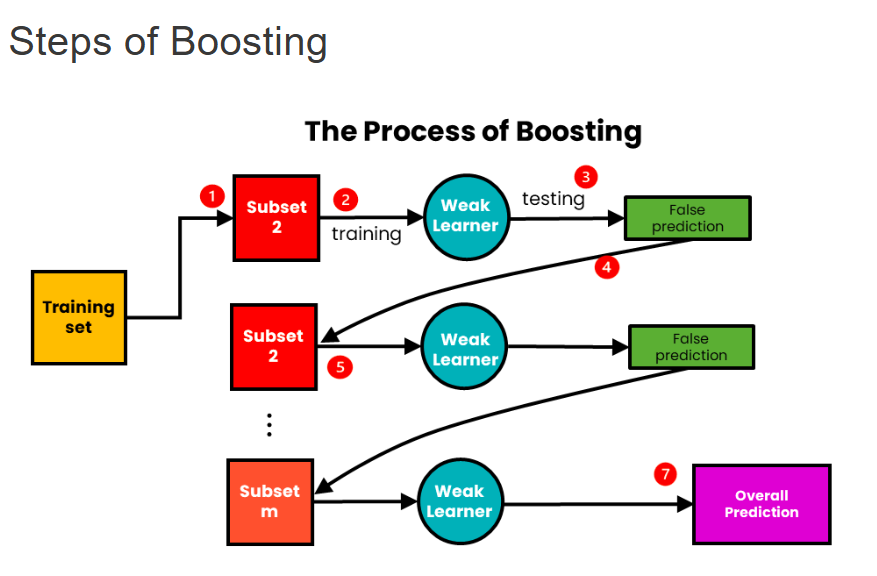

In [2]:
from IPython.display import Image

# Provide the path to the image file (can be a URL as well)
Image('D:\\PROJECT_PRACTISE_DIRS\\DSML_PRACTISE_FILES\\STATISTICS\\images\\boosting.png')

In [3]:
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv("D:\\utils\\DataSets\\ad_spend.csv")
df.head(3)

,Ad Spend ($),Season,Revenue ($)
0,463,Monsoon,440
1,158,Winter,297
2,328,Monsoon,214


In [5]:
g = df.groupby("Season")[['Revenue ($)', 'Ad Spend ($)']].mean()
g

,Revenue ($),Ad Spend ($)
Season,,
Monsoon,423.150685,517.643836
Summer,689.360656,573.836066
Winter,826.530303,552.560606


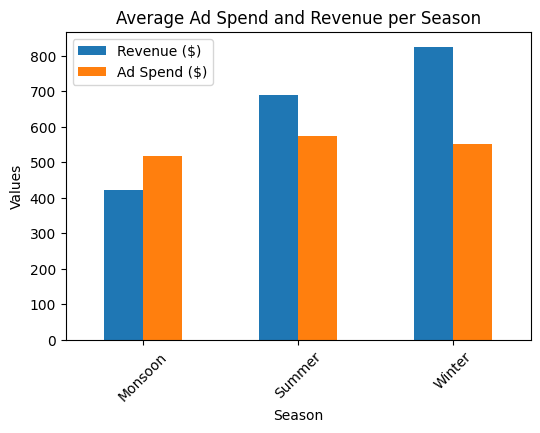

In [6]:
ax = g.plot(kind='bar', figsize=(6, 4))
ax.set_title('Average Ad Spend and Revenue per Season')
ax.set_xlabel('Season')
ax.set_ylabel('Values')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

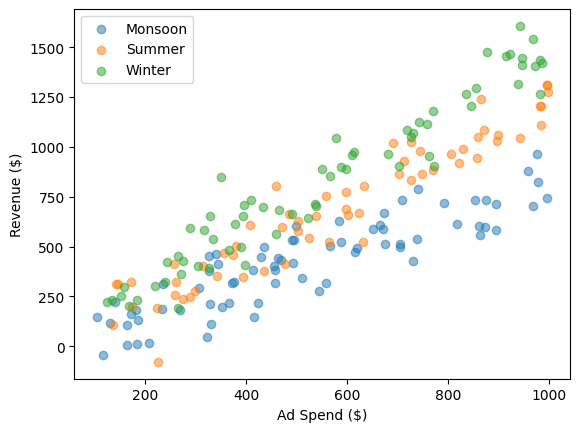

In [7]:
for season, subdf in df.groupby("Season"):
    plt.scatter(subdf["Ad Spend ($)"], subdf["Revenue ($)"], label=season, alpha=0.5)

plt.xlabel("Ad Spend ($)")    
plt.ylabel("Revenue ($)")
plt.legend()
plt.show()

In [8]:
df_encoded = pd.get_dummies(df, columns=['Season'], drop_first=True)
df_encoded

,Ad Spend ($),Revenue ($),Season_Summer,Season_Winter
0,463,440,False,False
1,158,297,False,True
2,328,214,False,False
3,322,48,False,False
4,726,1048,False,True
...,...,...,...,...
195,407,609,True,False
196,182,183,False,False
197,184,10,False,False
198,380,504,True,False


In [9]:
from sklearn.model_selection import train_test_split

X = df_encoded[["Ad Spend ($)", "Season_Summer", "Season_Winter"]]
y = df_encoded["Revenue ($)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8882097000477289

In [11]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8972778553142061

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9149899654766234

In [14]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)

mean_squared_error(y_test, y_pred)

14075.189625267229

In [15]:
df_eval = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_eval.head(3)

,Actual,Predicted
59,605,677.144222
5,1125,1073.575312
20,699,626.698237


In [18]:
df_eval['Diff %'] = abs((df_eval['Predicted'] - df_eval['Actual'])*100/df_eval['Actual'])
df_eval[2:3]

,Actual,Predicted,Diff %
20,699,626.698237,10.3436


In [19]:
df_eval['Diff %'].quantile(0.75)

25.419922596675733